In [1]:
import pandas as pd

In [2]:
tweets_data = pd.read_csv('Tweets.csv')

In [4]:
tweets_data.shape

(14640, 15)

In [4]:
mood_count = tweets_data['airline_sentiment'].value_counts()

In [5]:
mood_count

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [6]:
tweets_data['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0,0.5,'Sentiment Count')

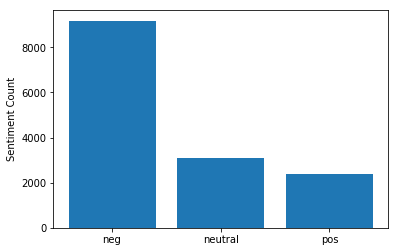

In [8]:
Index = [1,2,3]
plt.bar(Index, mood_count)
plt.xticks(Index, ['neg', 'neutral', 'pos'])
plt.ylabel('Sentiment Count')


In [9]:
df_airline_united = tweets_data[tweets_data['airline'] == 'United']

In [11]:
# from wordcloud import WordCloud, STOPWORDS

In [12]:
# df = tweets_data[tweets_data['airline_sentiment'] == 'negative']

In [13]:
# df.head()

In [14]:
# words = ' '.join(df['text'])

In [15]:
# wordcloud = WordCloud(stopwords = 
#                       STOPWORDS, background_color='black', 
#                       height = 2500, width = 3000).generate(words)

In [16]:
# plt.imshow(wordcloud)
# plt.axis('off')

In [17]:
# tweets_data['sentiment'] = tweets_data['airline_sentiment'].apply(

# lambda x: 0 if x =='negative' else 1)

In [11]:
from nltk.corpus import stopwords

In [19]:
def tweet_to_words(raw_tweet):

    words = raw_tweet.lower().split()
    stopw = set(stopwords.words("english"))
    
    meaningful_words = [w for w in words if not w in stopw]
    
    return (" ".join(meaningful_words))

In [20]:
#tweets_data['clean_tweets'] = tweets_data['text'].apply(tweet_to_words)

In [12]:
data = tweets_data['text']

In [13]:
target = tweets_data['airline_sentiment']

In [14]:
from sklearn.cross_validation import train_test_split

C:\Users\Shaunak Chadha\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.2)

In [16]:
xtest=x_test
xtrain = x_train
ytrain = y_train
ytest=y_test

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
v = CountVectorizer(analyzer = "word", ngram_range = (1,2))

In [33]:
xtrain.reset_index(drop = True , inplace = True)

In [34]:
ytrain.reset_index(drop = True , inplace = True)

In [37]:
train_features = v.fit_transform(xtrain)

In [35]:
xtest.reset_index(drop = True , inplace = True)

In [36]:
ytest.reset_index(drop = True , inplace = True)

In [40]:
xtest[3] = "It was a very nice party"

In [41]:
test_features = v.transform(xtest)

In [42]:
from sklearn.tree import DecisionTreeClassifier


In [43]:
clf = DecisionTreeClassifier()
clf.fit(train_features, y_train)
clf.score(test_features, y_test)

0.701844262295082

In [44]:
clf.predict(test_features[3])

array(['neutral'], dtype=object)

In [45]:
from sklearn.naive_bayes import MultinomialNB

In [46]:
clf = MultinomialNB()
clf.fit(train_features, y_train)
clf.score(test_features, y_test)

0.7438524590163934

In [47]:
clf.predict(test_features[3])

array(['positive'], dtype='<U8')

In [50]:
data

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
5        @VirginAmerica seriously would pay $30 a fligh...
6        @VirginAmerica yes, nearly every time I fly VX...
7        @VirginAmerica Really missed a prime opportuni...
8          @virginamerica Well, I didn't…but NOW I DO! :-D
9        @VirginAmerica it was amazing, and arrived an ...
10       @VirginAmerica did you know that suicide is th...
11       @VirginAmerica I &lt;3 pretty graphics. so muc...
12       @VirginAmerica This is such a great deal! Alre...
13       @VirginAmerica @virginmedia I'm flying your #f...
14                                  @VirginAmerica Thanks!
15           @VirginAmerica SFO-PDX schedule is still MIA.
16       @VirginAmerica So excited for my first cross c.

In [1]:
from sklearn import preprocessing

In [2]:
le = preprocessing.LabelEncoder()
le.fit([1 ,1,3,3,5,5,7,7,9,9,])

LabelEncoder()

In [5]:
le.classes_

array([1, 3, 5, 7, 9])

In [8]:
ar  = le.transform([1 ,1,3,3,5,5,7,7,9,9,])

In [7]:
le.inverse_transform([0, 0, 1, 1, 2, 2, 3, 3, 4, 4])

C:\Users\Shaunak Chadha\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([1, 1, 3, 3, 5, 5, 7, 7, 9, 9])

In [9]:
ar

array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4], dtype=int64)